<a href="https://colab.research.google.com/github/leyixu21/master_thesis/blob/main/get_flickr_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparations

In [4]:
! pip install flickrapi
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.0 MB/s 
     |████████████████████████████████| 6.3 MB 48.4 MB/s 
     |████████████████████████████████| 16.7 MB 36.0 MB/s 


In [21]:
from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/master_thesis_data/'

In [12]:
from io import StringIO
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
import os, time, sys
import json
import pandas as pd
import calendar

import folium

import geopandas as gpd

# New York

## Collect Flickr Data

In [24]:
# Source: https://fivequestionz.home.blog/2020/07/30/how-to-map-the-photo-location-of-flickr-using-python-and-qgis/

## Add your API Key and secret of Flickr
key = "0c15e34e5d1c5ed988c007ab2992ed25"
secret = "c43c334c97c11d2c"

# Span to access the flickr server
wait_time = 1

output_json = 'newyork_flickr_photos_'
 ## Please change the output file name

keyword = sys.argv[1]

photos = []
l = 0
##Loop start
n= [1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3]
for y in [2021]: ## 10 years. You can change the years to collect photos from Flickr.

    for k in [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11,12,12,12]:
        m = k
        l = l+1
        print(l)
        
        days = calendar.monthrange(y,m)[1]
        
        if n[l-1] == 3:
            min_taken_date = str(y) + '-' + str(m) + '-21'
            max_taken_date = str(y) + '-' + str(m) + '-' + str(days)
            #reset I for the next year
            if m == 12:
                l = 0
        elif n[l-1] ==2:
            min_taken_date = str(y) + '-' + str(m) + '-11'
            max_taken_date = str(y) + '-' + str(m) + '-20'
        elif n[l-1] ==1:
            min_taken_date = str(y) + '-' + str(m) + '-01'
            max_taken_date = str(y) + '-' + str(m) + '-10'
            
        print(n[l-1])
        print(min_taken_date)
        print(max_taken_date)
        
        # connecting to Flickr
        flickr = FlickrAPI(key, secret, format='parsed-json')
        
        i = 1
        while True:
            result = flickr.photos.search(
                #text = 'your keyword',    #keyword change
                per_page = 400,            #number of data per page
                has_geo = 1,               #Photo that has geo location
                min_taken_date = min_taken_date, 
                max_taken_date = max_taken_date,
                #woe_id = 7153351, #7153351 # woeid does not work.
                bbox = '-74.281672,40.480880,-73.661053,40.940826',
 #Please change the here for your study area in the order. LonLL, LatLL, LonUR, LatUR. LL:Lower Left corner, UR:Upper Right corner
                media = 'photos',         # collecting photos without video
                sort =  'date-taken-desc',       # collecting photos from latest
                privacy_filter =1,
                safe_search = 1,          #  photos without violence
                extras = 'geo,url_n,date_taken,views, license, tags, machine_tags',
                page = i,
            )

            # export result
            #photos = ChainMap(photos, result['photos'])
            #photos = result['photos']
            j = result['photos']
            
            print('total_photo', j['total'])
            print('Current_pages', i)
            
            photos += j[ 'photo']

            #you can download up to 4000 photos in one query.
            if i > 10 :
                print('Your query has been exceeded the limit of photos.4000 photos' + str(i))
                break
            elif i >= j['pages'] :
                break
            i += 1
            
# export as Json format
d = json.dumps(photos, sort_keys = True, indent = 2)
#print(d)
fp = open(path+output_json+str(y)+'.json', 'w' )
fp.write( d )
fp.close()

# export as csv
df = pd.read_json (StringIO(d))
df.to_csv(path+output_json+str(y)+'.csv', encoding='utf-8')

1
1
2021-1-01
2021-1-10
total_photo 949
Current_pages 1
total_photo 926
Current_pages 2
total_photo 955
Current_pages 3
total_photo 1184
Current_pages 4
total_photo 1166
Current_pages 5
2
2
2021-1-11
2021-1-20
total_photo 1031
Current_pages 1
total_photo 936
Current_pages 2
total_photo 740
Current_pages 3
3
3
2021-1-21
2021-1-31
total_photo 321
Current_pages 1
total_photo 732
Current_pages 2
total_photo 490
Current_pages 3
4
1
2021-2-01
2021-2-10
total_photo 616
Current_pages 1
total_photo 808
Current_pages 2
total_photo 844
Current_pages 3
total_photo 842
Current_pages 4
5
2
2021-2-11
2021-2-20
total_photo 585
Current_pages 1
total_photo 396
Current_pages 2
6
3
2021-2-21
2021-2-28
total_photo 692
Current_pages 1
total_photo 969
Current_pages 2
total_photo 1010
Current_pages 3
total_photo 860
Current_pages 4
7
1
2021-3-01
2021-3-10
total_photo 800
Current_pages 1
total_photo 913
Current_pages 2
total_photo 573
Current_pages 3
8
2
2021-3-11
2021-3-20
total_photo 537
Current_pages 1
tota

In [78]:
from shapely import wkt
# read flickr data
newyork_bbox_flickr_2021 = pd.read_csv(path+'newyork_flickr_photos_2021.csv')

# convert dataframe to geodataframe
newyork_bbox_flickr_2021 = gpd.GeoDataFrame(
    newyork_bbox_flickr_2021, geometry=gpd.points_from_xy(newyork_bbox_flickr_2021.longitude, newyork_bbox_flickr_2021.latitude, crs='epsg:4326')
)

newyork_bbox_flickr_2021

,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,geo_is_friend,...,place_id,secret,server,tags,title,url_n,views,width_n,woeid,geometry
0,0,16,0,2021-01-09 09:07:03,0,0,66,0,0,0,...,NaN,dc03896d5b,65535,newyorkcity newyork unitedstates,HTP10461,https://live.staticflickr.com/65535/5081803880...,91,320.0,8521641,POINT (-74.00604 40.72597)
1,1,16,0,2021-01-01 18:00:29,0,0,66,0,0,0,...,NaN,9f5c0b2a4c,65535,newyearseve newyearsday timessquarenyc 2020202...,Happy New Year 2021 Walgreens light up Times S...,https://live.staticflickr.com/65535/5079287636...,1504,240.0,6930378,POINT (-73.98660 40.75636)
2,2,16,0,2021-01-01 18:00:18,0,0,66,0,0,0,...,NaN,efd42fa668,65535,timessquarenyc newyearseve newyearsday 2020202...,Ryan Janek Wolowski Times Square NYC New Years...,https://live.staticflickr.com/65535/5079268724...,2305,320.0,6930378,POINT (-73.98660 40.75636)
3,3,16,0,2021-01-02 12:47:25,0,0,66,0,0,0,...,NaN,ed6d2d0cc9,65535,saturday january2 walkacrossharlemriverstwelve...,NaN,https://live.staticflickr.com/65535/5079548753...,40,240.0,6332426,POINT (-73.93144 40.81396)
4,4,16,0,2021-01-02 12:01:56,0,0,66,0,0,0,...,NaN,f30be3aa23,65535,saturdayjanuary2walkacrossharlemriverstwelvepe...,NaN,https://live.staticflickr.com/65535/5079550774...,53,320.0,5127670,POINT (-73.93177 40.80783)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20481,20481,15,0,2021-12-21 11:20:49,0,1,66,0,0,0,...,NaN,53a9b5ba63,65535,kodakportra400 35mm nyc streetphotography film...,Grand Central Terminal,https://live.staticflickr.com/65535/5176138990...,83,226.0,6944378,POINT (-73.97734 40.75277)
20482,20482,16,0,2021-12-22 15:58:51,0,0,66,0,0,0,...,NaN,594f270be4,65535,elizabeth newjersey unitedstates,HTP11028,https://live.staticflickr.com/65535/5176686761...,98,320.0,5101611,POINT (-74.20776 40.64359)
20483,20483,16,0,2021-12-24 09:27:39,0,0,66,0,0,0,...,NaN,3462a6d0b3,65535,bayonne newjersey unitedstates,HTP11281,https://live.staticflickr.com/65535/5177274329...,95,320.0,6331907,POINT (-74.08020 40.66528)
20484,20484,16,0,2021-12-30 10:39:50,0,0,66,0,0,0,...,NaN,d3bbbaa2d0,65535,NaN,IMG_5475,https://live.staticflickr.com/65535/5178886203...,20,320.0,5119167,POINT (-73.96141 40.59464)


## Load Boundary Data

In [57]:
# read boundary data
newyork = gpd.read_file(path+'Borough Boundaries.geojson')

newyork

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1623631283.36,325924.002076,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2,Bronx,1187189499.3,463277.240478,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,1,Manhattan,636605816.437,359103.151368,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3,Brooklyn,1934169228.83,728478.125489,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,Queens,3041397430.33,888238.562635,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [60]:
# create folium map
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')

for _, r in newyork.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['boro_name']).add_to(geo_j)
    geo_j.add_to(m)

m

In [58]:
# get the coordination system
newyork.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [131]:
# get Flickr data inside the city boundary
newyork_flickr_2021 = newyork_bbox_flickr_2021[newyork_bbox_flickr_2021.within(newyork.unary_union)]

newyork_flickr_2021

,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,geo_is_friend,...,place_id,secret,server,tags,title,url_n,views,width_n,woeid,geometry
0,0,16,0,2021-01-09 09:07:03,0,0,66,0,0,0,...,NaN,dc03896d5b,65535,newyorkcity newyork unitedstates,HTP10461,https://live.staticflickr.com/65535/5081803880...,91,320.0,8521641,POINT (-74.00604 40.72597)
1,1,16,0,2021-01-01 18:00:29,0,0,66,0,0,0,...,NaN,9f5c0b2a4c,65535,newyearseve newyearsday timessquarenyc 2020202...,Happy New Year 2021 Walgreens light up Times S...,https://live.staticflickr.com/65535/5079287636...,1504,240.0,6930378,POINT (-73.98660 40.75636)
2,2,16,0,2021-01-01 18:00:18,0,0,66,0,0,0,...,NaN,efd42fa668,65535,timessquarenyc newyearseve newyearsday 2020202...,Ryan Janek Wolowski Times Square NYC New Years...,https://live.staticflickr.com/65535/5079268724...,2305,320.0,6930378,POINT (-73.98660 40.75636)
3,3,16,0,2021-01-02 12:47:25,0,0,66,0,0,0,...,NaN,ed6d2d0cc9,65535,saturday january2 walkacrossharlemriverstwelve...,NaN,https://live.staticflickr.com/65535/5079548753...,40,240.0,6332426,POINT (-73.93144 40.81396)
4,4,16,0,2021-01-02 12:01:56,0,0,66,0,0,0,...,NaN,f30be3aa23,65535,saturdayjanuary2walkacrossharlemriverstwelvepe...,NaN,https://live.staticflickr.com/65535/5079550774...,53,320.0,5127670,POINT (-73.93177 40.80783)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20478,20478,16,0,2021-12-25 17:07:00,0,0,66,0,0,0,...,NaN,b24206c47d,65535,NaN,NaN,https://live.staticflickr.com/65535/5179019409...,5,320.0,5117663,POINT (-74.03571 40.62855)
20479,20479,16,0,2021-12-22 11:22:54,0,0,66,0,0,0,...,NaN,d790491322,65535,windows newyorkcity newyork unitedstates,In/Out of Focus,https://live.staticflickr.com/65535/5179249572...,18,320.0,6332163,POINT (-73.98343 40.77919)
20481,20481,15,0,2021-12-21 11:20:49,0,1,66,0,0,0,...,NaN,53a9b5ba63,65535,kodakportra400 35mm nyc streetphotography film...,Grand Central Terminal,https://live.staticflickr.com/65535/5176138990...,83,226.0,6944378,POINT (-73.97734 40.75277)
20484,20484,16,0,2021-12-30 10:39:50,0,0,66,0,0,0,...,NaN,d3bbbaa2d0,65535,NaN,IMG_5475,https://live.staticflickr.com/65535/5178886203...,20,320.0,5119167,POINT (-73.96141 40.59464)


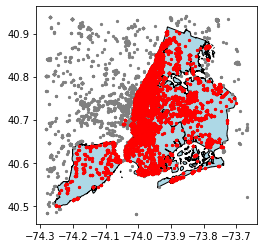

In [132]:
# plot the boundary
base = newyork.plot(color='lightblue', edgecolor='black')

# plot the flickr data within the bounding box
newyork_bbox_flickr_2021.plot(ax=base, marker='o', color='grey', markersize=5)

# plot the flickr data within the bouondary
newyork_flickr_2021.plot(ax=base, marker='o', color='red', markersize=5)

# Zurich

## Collect Flickr Data

In [67]:
# Source: https://fivequestionz.home.blog/2020/07/30/how-to-map-the-photo-location-of-flickr-using-python-and-qgis/

## Add your API Key and secret of Flickr
key = "0c15e34e5d1c5ed988c007ab2992ed25"
secret = "c43c334c97c11d2c"

# Span to access the flickr server
wait_time = 1

output_json = 'zurich_flickr_photos_'
 ## Please change the output file name

keyword = sys.argv[1]

photos = []
l = 0
##Loop start
n= [1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3]
for y in [2021]: ## 10 years. You can change the years to collect photos from Flickr.

    for k in [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11,12,12,12]:
        m = k
        l = l+1
        print(l)
        
        days = calendar.monthrange(y,m)[1]
        
        if n[l-1] == 3:
            min_taken_date = str(y) + '-' + str(m) + '-21'
            max_taken_date = str(y) + '-' + str(m) + '-' + str(days)
            #reset I for the next year
            if m == 12:
                l = 0
        elif n[l-1] ==2:
            min_taken_date = str(y) + '-' + str(m) + '-11'
            max_taken_date = str(y) + '-' + str(m) + '-20'
        elif n[l-1] ==1:
            min_taken_date = str(y) + '-' + str(m) + '-01'
            max_taken_date = str(y) + '-' + str(m) + '-10'
            
        print(n[l-1])
        print(min_taken_date)
        print(max_taken_date)
        
        # connecting to Flickr
        flickr = FlickrAPI(key, secret, format='parsed-json')
        
        i = 1
        while True:
            result = flickr.photos.search(
                #text = 'your keyword',    #keyword change
                per_page = 400,            #number of data per page
                has_geo = 1,               #Photo that has geo location
                min_taken_date = min_taken_date, 
                max_taken_date = max_taken_date,
                #woe_id = 7153351, #7153351 # woeid does not work.
                bbox = '8.435959,47.308864,8.632319,47.436570',
 #Please change the here for your study area in the order. LonLL, LatLL, LonUR, LatUR. LL:Lower Left corner, UR:Upper Right corner
                media = 'photos',         # collecting photos without video
                sort =  'date-taken-desc',       # collecting photos from latest
                privacy_filter =1,
                safe_search = 1,          #  photos without violence
                extras = 'geo,url_n,date_taken,views, license, tags, machine_tags',
                page = i,
            )

            # export result
            #photos = ChainMap(photos, result['photos'])
            #photos = result['photos']
            j = result['photos']
            
            print('total_photo', j['total'])
            print('Current_pages', i)
            
            photos += j[ 'photo']

            #you can download up to 4000 photos in one query.
            if i > 10 :
                print('Your query has been exceeded the limit of photos.4000 photos' + str(i))
                break
            elif i >= j['pages'] :
                break
            i += 1
            
# export as Json format
d = json.dumps(photos, sort_keys = True, indent = 2)
#print(d)
fp = open(path+output_json+str(y)+'.json', 'w' )
fp.write( d )
fp.close()

# export as csv
df = pd.read_json (StringIO(d))
df.to_csv(path+output_json+str(y)+'.csv', encoding='utf-8')

1
1
2021-1-01
2021-1-10
total_photo 29
Current_pages 1
2
2
2021-1-11
2021-1-20
total_photo 143
Current_pages 1
3
3
2021-1-21
2021-1-31
total_photo 58
Current_pages 1
4
1
2021-2-01
2021-2-10
total_photo 26
Current_pages 1
5
2
2021-2-11
2021-2-20
total_photo 68
Current_pages 1
6
3
2021-2-21
2021-2-28
total_photo 22
Current_pages 1
7
1
2021-3-01
2021-3-10
total_photo 30
Current_pages 1
8
2
2021-3-11
2021-3-20
total_photo 31
Current_pages 1
9
3
2021-3-21
2021-3-31
total_photo 85
Current_pages 1
10
1
2021-4-01
2021-4-10
total_photo 123
Current_pages 1
11
2
2021-4-11
2021-4-20
total_photo 52
Current_pages 1
12
3
2021-4-21
2021-4-30
total_photo 57
Current_pages 1
13
1
2021-5-01
2021-5-10
total_photo 59
Current_pages 1
14
2
2021-5-11
2021-5-20
total_photo 44
Current_pages 1
15
3
2021-5-21
2021-5-31
total_photo 43
Current_pages 1
16
1
2021-6-01
2021-6-10
total_photo 81
Current_pages 1
17
2
2021-6-11
2021-6-20
total_photo 38
Current_pages 1
18
3
2021-6-21
2021-6-30
total_photo 43
Current_pages 1

In [82]:
from shapely import wkt
# read flickr data
zurich_bbox_flickr_2021 = pd.read_csv(path+'zurich_flickr_photos_2021.csv')

# convert dataframe to geodataframe
zurich_bbox_flickr_2021 = gpd.GeoDataFrame(
    zurich_bbox_flickr_2021, geometry=gpd.points_from_xy(zurich_bbox_flickr_2021.longitude, zurich_bbox_flickr_2021.latitude, crs='epsg:4326')
)

zurich_bbox_flickr_2021

,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,geo_is_friend,...,place_id,secret,server,tags,title,url_n,views,width_n,woeid,geometry
0,0,16,0,2021-01-06 17:07:33,0,0,66,0,0,0,...,NaN,21f92bb493,65535,NaN,Ich Liebe Dich,https://live.staticflickr.com/65535/5080883108...,412,320,6295513,POINT (8.49396 47.38264)
1,1,16,0,2021-01-01 16:36:58,0,0,66,0,0,0,...,NaN,c82473b86c,65535,zürich höngg affe monkey schweiz plüschtier fe...,Affe am Pranger / Monkey in the pillory,https://live.staticflickr.com/65535/5079536648...,3656,320,6295485,POINT (8.51347 47.39780)
2,2,15,0,2021-01-03 12:55:37,0,0,66,0,0,0,...,NaN,724a1e5781,65535,restaurant wirtschaft schützenstube hönggerber...,Schützenstube,https://live.staticflickr.com/65535/5079647055...,2031,320,6295539,POINT (8.49683 47.40966)
3,3,16,0,2021-01-06 19:34:15,0,0,66,0,0,0,...,NaN,b78371c606,65535,europa europe kantonzürich kontinent szu schwe...,When there was snow on Uetliberg,https://live.staticflickr.com/65535/5088879280...,804,320,6290601,POINT (8.48764 47.35246)
4,4,16,0,2021-01-06 19:44:52,0,0,66,0,0,0,...,NaN,4e7cce7150,65535,europa europe kantonzürich kontinent schweiz s...,Busy winter forest,https://live.staticflickr.com/65535/5082993097...,583,320,6295453,POINT (8.48663 47.35412)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2221,16,0,2021-12-23 11:00:57,0,0,66,0,0,0,...,NaN,66586aeb41,65535,schweiz sculpture skulptur statue zurich züric...,Das Mädchen (1954) - Otto Teucher (1899 - 1994),https://live.staticflickr.com/65535/5184577381...,66,320,11071633,POINT (8.54177 47.38275)
2222,2222,16,0,2021-12-23 12:30:47,0,0,66,0,0,0,...,NaN,14077b876c,65535,sculpture skulptur statue,Zürich,https://live.staticflickr.com/65535/5186849161...,59,320,6295483,POINT (8.54779 47.37559)
2223,2223,15,0,2021-12-24 05:12:16,0,0,66,0,0,0,...,NaN,155321883b,65535,archiv2021 2021 suisse schweiz switzerland zur...,Limmatquai in Zürich 24.12.2021 2919,https://live.staticflickr.com/65535/5192768169...,401,320,6295493,POINT (8.54178 47.37281)
2224,2224,16,0,2021-12-21 09:58:05,0,0,66,0,0,0,...,NaN,67ddc44468,65535,NaN,IMG_0720,https://live.staticflickr.com/65535/5188640099...,5,320,6291736,POINT (8.50011 47.43601)


In [83]:
zurich_bbox_flickr_2021

,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,geo_is_friend,...,place_id,secret,server,tags,title,url_n,views,width_n,woeid,geometry
0,0,16,0,2021-01-06 17:07:33,0,0,66,0,0,0,...,NaN,21f92bb493,65535,NaN,Ich Liebe Dich,https://live.staticflickr.com/65535/5080883108...,412,320,6295513,POINT (8.49396 47.38264)
1,1,16,0,2021-01-01 16:36:58,0,0,66,0,0,0,...,NaN,c82473b86c,65535,zürich höngg affe monkey schweiz plüschtier fe...,Affe am Pranger / Monkey in the pillory,https://live.staticflickr.com/65535/5079536648...,3656,320,6295485,POINT (8.51347 47.39780)
2,2,15,0,2021-01-03 12:55:37,0,0,66,0,0,0,...,NaN,724a1e5781,65535,restaurant wirtschaft schützenstube hönggerber...,Schützenstube,https://live.staticflickr.com/65535/5079647055...,2031,320,6295539,POINT (8.49683 47.40966)
3,3,16,0,2021-01-06 19:34:15,0,0,66,0,0,0,...,NaN,b78371c606,65535,europa europe kantonzürich kontinent szu schwe...,When there was snow on Uetliberg,https://live.staticflickr.com/65535/5088879280...,804,320,6290601,POINT (8.48764 47.35246)
4,4,16,0,2021-01-06 19:44:52,0,0,66,0,0,0,...,NaN,4e7cce7150,65535,europa europe kantonzürich kontinent schweiz s...,Busy winter forest,https://live.staticflickr.com/65535/5082993097...,583,320,6295453,POINT (8.48663 47.35412)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2221,16,0,2021-12-23 11:00:57,0,0,66,0,0,0,...,NaN,66586aeb41,65535,schweiz sculpture skulptur statue zurich züric...,Das Mädchen (1954) - Otto Teucher (1899 - 1994),https://live.staticflickr.com/65535/5184577381...,66,320,11071633,POINT (8.54177 47.38275)
2222,2222,16,0,2021-12-23 12:30:47,0,0,66,0,0,0,...,NaN,14077b876c,65535,sculpture skulptur statue,Zürich,https://live.staticflickr.com/65535/5186849161...,59,320,6295483,POINT (8.54779 47.37559)
2223,2223,15,0,2021-12-24 05:12:16,0,0,66,0,0,0,...,NaN,155321883b,65535,archiv2021 2021 suisse schweiz switzerland zur...,Limmatquai in Zürich 24.12.2021 2919,https://live.staticflickr.com/65535/5192768169...,401,320,6295493,POINT (8.54178 47.37281)
2224,2224,16,0,2021-12-21 09:58:05,0,0,66,0,0,0,...,NaN,67ddc44468,65535,NaN,IMG_0720,https://live.staticflickr.com/65535/5188640099...,5,320,6291736,POINT (8.50011 47.43601)


## Load Boundary Data

In [62]:
# read boundary data
zurich = gpd.read_file(path+'zurich_boundary/data/stzh.adm_stadtkreise_a.json')

zurich

,objid,bezeichnung,name,entstehung,geometry
0,6,Kreis 7,7,6,"POLYGON ((8.54885 47.36602, 8.54901 47.36601, ..."
1,10,Kreis 11,11,4,"POLYGON ((8.55562 47.40129, 8.55581 47.40160, ..."
2,4,Kreis 9,9,4,"POLYGON ((8.50320 47.38100, 8.50308 47.38131, ..."
3,8,Kreis 2,2,4,"POLYGON ((8.52820 47.36885, 8.52761 47.36847, ..."
4,12,Kreis 10,10,4,"POLYGON ((8.50543 47.39495, 8.50546 47.39495, ..."
5,7,Kreis 3,3,4,"POLYGON ((8.52820 47.36885, 8.52798 47.36900, ..."
6,11,Kreis 12,12,4,"POLYGON ((8.58317 47.38830, 8.58315 47.38851, ..."
7,1,Kreis 6,6,4,"POLYGON ((8.55562 47.40129, 8.55543 47.40137, ..."
8,9,Kreis 8,8,6,"POLYGON ((8.55388 47.34086, 8.56442 47.34611, ..."
9,2,Kreis 4,4,1,"POLYGON ((8.52820 47.36885, 8.52901 47.36938, ..."


In [64]:
# create folium map
m = folium.Map(location=[47.35, 8.53], zoom_start=12, tiles='CartoDB positron')
for _, r in zurich.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['bezeichnung']).add_to(geo_j)
    geo_j.add_to(m)

m

In [63]:
# get the coordination system
zurich.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [129]:
# get Flickr data inside the city boundary
zurich_flickr_2021 = zurich_bbox_flickr_2021[zurich_bbox_flickr_2021.within(zurich.unary_union)]

zurich_flickr_2021

,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,geo_is_friend,...,place_id,secret,server,tags,title,url_n,views,width_n,woeid,geometry
0,0,16,0,2021-01-06 17:07:33,0,0,66,0,0,0,...,NaN,21f92bb493,65535,NaN,Ich Liebe Dich,https://live.staticflickr.com/65535/5080883108...,412,320,6295513,POINT (8.49396 47.38264)
1,1,16,0,2021-01-01 16:36:58,0,0,66,0,0,0,...,NaN,c82473b86c,65535,zürich höngg affe monkey schweiz plüschtier fe...,Affe am Pranger / Monkey in the pillory,https://live.staticflickr.com/65535/5079536648...,3656,320,6295485,POINT (8.51347 47.39780)
2,2,15,0,2021-01-03 12:55:37,0,0,66,0,0,0,...,NaN,724a1e5781,65535,restaurant wirtschaft schützenstube hönggerber...,Schützenstube,https://live.staticflickr.com/65535/5079647055...,2031,320,6295539,POINT (8.49683 47.40966)
3,3,16,0,2021-01-06 19:34:15,0,0,66,0,0,0,...,NaN,b78371c606,65535,europa europe kantonzürich kontinent szu schwe...,When there was snow on Uetliberg,https://live.staticflickr.com/65535/5088879280...,804,320,6290601,POINT (8.48764 47.35246)
4,4,16,0,2021-01-06 19:44:52,0,0,66,0,0,0,...,NaN,4e7cce7150,65535,europa europe kantonzürich kontinent schweiz s...,Busy winter forest,https://live.staticflickr.com/65535/5082993097...,583,320,6295453,POINT (8.48663 47.35412)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,2220,16,0,2021-12-23 11:01:25,0,0,66,0,0,0,...,NaN,f164b5902a,65535,schweiz sculpture skulptur statue zurich züric...,Das Mädchen (1954) - Otto Teucher (1899 - 1994),https://live.staticflickr.com/65535/5184706960...,38,320,11071633,POINT (8.54177 47.38275)
2221,2221,16,0,2021-12-23 11:00:57,0,0,66,0,0,0,...,NaN,66586aeb41,65535,schweiz sculpture skulptur statue zurich züric...,Das Mädchen (1954) - Otto Teucher (1899 - 1994),https://live.staticflickr.com/65535/5184577381...,66,320,11071633,POINT (8.54177 47.38275)
2222,2222,16,0,2021-12-23 12:30:47,0,0,66,0,0,0,...,NaN,14077b876c,65535,sculpture skulptur statue,Zürich,https://live.staticflickr.com/65535/5186849161...,59,320,6295483,POINT (8.54779 47.37559)
2223,2223,15,0,2021-12-24 05:12:16,0,0,66,0,0,0,...,NaN,155321883b,65535,archiv2021 2021 suisse schweiz switzerland zur...,Limmatquai in Zürich 24.12.2021 2919,https://live.staticflickr.com/65535/5192768169...,401,320,6295493,POINT (8.54178 47.37281)


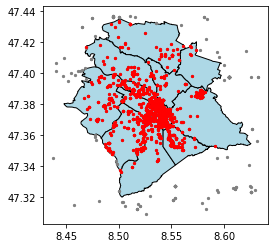

In [130]:
# plot the boundary
base = zurich.plot(color='lightblue', edgecolor='black')

# plot the flickr data within the bounding box
zurich_bbox_flickr_2021.plot(ax=base, marker='o', color='grey', markersize=5)

# plot the flickr data within the bouondary
zurich_flickr_2021.plot(ax=base, marker='o', color='red', markersize=5)